In [1]:
import pandas as pd
import datetime
pd.options.mode.chained_assignment = None

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
#owid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv').fillna('')
#owid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv').fillna('')
owid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv').fillna(0)

In [3]:
data_cln_dct = {'cardiovasc_death_rate' : '', 'stringency_index':'', 'female_smokers' : '', 'male_smokers' : '', 'handwashing_facilities' : '', 'hospital_beds_per_thousand' : '', 'human_development_index' : ''}
rplc_dct = {'total_cases': '', 'new_cases': '', 'total_deaths': '', 'new_deaths': '', 'median_age': '', 'aged_65_older':'', 'aged_70_older':''}
rplc_dct.update(data_cln_dct)

owid = owid.replace({'location':'United States'}, 'United States of America')
#Country Filter
#cntry_fltr_lst = ['United States of America', 'India', 'Italy', 'France', 'Spain']
#owid = owid[(owid['location'].isin(cntry_fltr_lst))].reset_index(drop=True) ### 245 indicates data till end of august

owid['dayofyear'] = pd.to_datetime(owid['date']).dt.dayofyear
owid = owid.replace(rplc_dct, 0)
owid = owid[(owid['iso_code']!='') & (owid['location']!='World') & (owid['dayofyear']>31) & (owid['dayofyear']<245) & (owid['median_age']>0) & (owid['aged_65_older']>0) & (owid['aged_70_older']>0) ].reset_index(drop=True) ### 245 indicates data till end of august
owid = owid.astype({'total_cases':'Int64','new_cases':'Int64','total_deaths':'Int64','new_deaths':'Int64'})
print(owid.shape)
owid['fraction_cases'] = 0; owid['fraction_deaths'] = 0
for i in set(owid['iso_code']):
    inddf = owid[owid['iso_code'] == i]
    ctrymx = inddf['total_cases'].iloc[-1]
    cntymxdth = inddf['total_deaths'].iloc[-1]
    owid['fraction_cases'][owid['iso_code'] == i] = inddf['new_cases'].astype('int') / int(ctrymx)
    if (cntymxdth!=0): owid['fraction_deaths'][owid['iso_code'] == i] = inddf['new_deaths'].astype('int') / int(cntymxdth)
    for j in list(data_cln_dct.keys()):
        owid[j][owid['iso_code'] == i] = inddf.groupby(['location'])[j].max()[0]

    
    
    
owid.to_csv('covid19_main.csv',index=False)

(33424, 42)


In [4]:
owid.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,dayofyear,fraction_cases,fraction_deaths
total_cases,1.000000,0.871609,0.900505,0.909022,0.616385,0.674843,0.315261,0.210418,0.248227,0.362429,...,0.037963,0.090479,0.015977,-0.047141,0.015246,0.075091,0.101701,0.145905,0.043353,0.023456
new_cases,0.871609,1.000000,0.981169,0.774654,0.739670,0.764437,0.231277,0.261561,0.270307,0.256677,...,0.042749,0.062788,0.001655,-0.018986,-0.007414,0.054309,0.083703,0.105590,0.084508,0.044773
new_cases_smoothed,0.900505,0.981169,1.000000,0.799418,0.732842,0.784855,0.243350,0.240922,0.278769,0.267819,...,0.043270,0.064400,0.002229,-0.020545,-0.006595,0.055497,0.085464,0.109953,0.070607,0.040920
total_deaths,0.909022,0.774654,0.799418,1.000000,0.650894,0.719540,0.295755,0.184507,0.216656,0.557943,...,0.008321,0.155974,0.009783,-0.070237,0.024530,0.136696,0.146676,0.137120,0.026379,0.013553
new_deaths,0.616385,0.739670,0.732842,0.650894,1.000000,0.924969,0.180866,0.213972,0.233342,0.294518,...,0.026109,0.098828,-0.005168,-0.027989,-0.001372,0.093317,0.110834,0.043974,0.064812,0.101057
new_deaths_smoothed,0.674843,0.764437,0.784855,0.719540,0.924969,1.000000,0.202110,0.212775,0.249959,0.333716,...,0.027299,0.107047,-0.005221,-0.031411,-0.000633,0.100730,0.119220,0.052144,0.058581,0.065788
total_cases_per_million,0.315261,0.231277,0.243350,0.295755,0.180866,0.202110,1.000000,0.563686,0.678845,0.491587,...,0.122443,0.098345,0.030367,-0.085734,0.035347,0.240252,0.187824,0.346632,0.092561,0.069461
new_cases_per_million,0.210418,0.261561,0.240922,0.184507,0.213972,0.212775,0.563686,1.000000,0.866593,0.238911,...,0.128688,0.032017,-0.004525,-0.024584,-0.011015,0.169203,0.076205,0.197225,0.414742,0.195201
new_cases_smoothed_per_million,0.248227,0.270307,0.278769,0.216656,0.233342,0.249959,0.678845,0.866593,1.000000,0.287188,...,0.143654,0.037693,-0.002178,-0.028850,-0.009929,0.192506,0.094052,0.232869,0.256526,0.152832
total_deaths_per_million,0.362429,0.256677,0.267819,0.557943,0.294518,0.333716,0.491587,0.238911,0.287188,1.000000,...,-0.093499,0.311873,0.006805,-0.121702,0.104093,0.304948,0.254759,0.261367,0.034086,0.025872


In [5]:
X = owid[['new_cases', 'new_cases_per_million', 'new_tests', 'new_tests_per_thousand', 'positive_rate', 'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']]
y = owid['new_deaths'].values
X

,new_cases,new_cases_per_million,new_tests,new_tests_per_thousand,positive_rate,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,0.000,0.0,0.000,0.000,84.26,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,0,0.000,0.0,0.000,0.000,84.26,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,0,0.000,0.0,0.000,0.000,84.26,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,0,0.000,0.0,0.000,0.000,84.26,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,0,0.000,0.0,0.000,0.000,84.26,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
5,0,0.000,0.0,0.000,0.000,84.26,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
6,0,0.000,0.0,0.000,0.000,84.26,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
7,0,0.000,0.0,0.000,0.000,84.26,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
8,0,0.000,0.0,0.000,0.000,84.26,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
9,0,0.000,0.0,0.000,0.000,84.26,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498


In [6]:
#X= preprocessing.StandardScaler().fit(X).transform(X)
#X

<h1>Data Analysis</h1>

K Nearest Neighbor(KNN)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (26739, 19) (26739,)
Test set: (6685, 19) (6685,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


array([0.53881825, 0.58249813, 0.57756171, 0.58145101, 0.58534031,
       0.58519073, 0.58698579, 0.5868362 , 0.58788332, 0.59177263,
       0.59296933, 0.59267016, 0.59057592, 0.59252057])

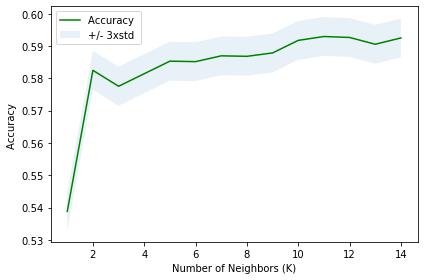

The best accuracy was with 0.5929693343305908 with k= 11


In [9]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


In [10]:
k = mean_acc.argmax()+1
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat = kNN_model.predict(X_test)

print("K Nearest Neighbor(KNN) accuracy: ", metrics.accuracy_score(y_test, yhat))
print(f1_score(y_test, yhat, average='weighted'))
print(jaccard_score(y_test, yhat, average='weighted'))

K Nearest Neighbor(KNN) accuracy:  0.5929693343305908
0.5391335178678995
0.4635443430102976


<h1>Decision Tree</h1>

In [11]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DT_model.fit(X_train,y_train)
yhat = DT_model.predict(X_test)
yhat

array([ 0,  7,  0, ...,  7, 35,  0], dtype=int64)

In [12]:
print("Decision Tree Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("\n")
print(f1_score(y_test, yhat, average='weighted'))
print(jaccard_score(y_test, yhat, average='weighted'))

Decision Tree Accuracy:  0.5929693343305908


0.503862321291815
0.4321361747609413


<h1>Support Vector Machine</h1>

from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train, y_train)
yhat = SVM_model.predict(X_test)
yhat

print("SVC's Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("\n")
print(f1_score(y_test, yhat, average='weighted'))
print(jaccard_score(y_test, yhat, average='weighted'))

<h1>LogisticRegression</h1>

In [13]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
yhat = LR_model.predict(X_test)
yhat

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([ 0,  0,  0, ...,  0, 94,  0], dtype=int64)

In [14]:
print("Logistic's Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("\n")
print(f1_score(y_test, yhat, average='weighted'))
print(jaccard_score(y_test, yhat, average='weighted'))

Logistic's Accuracy:  0.5889304412864622


0.47257648056131035
0.3913485448014417


<h1>Analysing Model</h1>

In [15]:
ANALYSE = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv').fillna(0)
data_cln_dct = {'cardiovasc_death_rate' : '', 'stringency_index':'', 'female_smokers' : '', 'male_smokers' : '', 'handwashing_facilities' : '', 'hospital_beds_per_thousand' : '', 'human_development_index' : ''}
rplc_dct = {'total_cases': '', 'new_cases': '', 'total_deaths': '', 'new_deaths': '', 'median_age': '', 'aged_65_older':'', 'aged_70_older':''}
rplc_dct.update(data_cln_dct)

ANALYSE = ANALYSE.replace({'location':'United States'}, 'United States of America')
ANALYSE['dayofyear'] = pd.to_datetime(ANALYSE['date']).dt.dayofyear
ANALYSE = ANALYSE.replace(rplc_dct, 0)
ANALYSE = ANALYSE[(ANALYSE['iso_code']!='') & (ANALYSE['location']=='United States of America') & (ANALYSE['dayofyear']>100) & (ANALYSE['dayofyear']<245) & (ANALYSE['median_age']>0) & (ANALYSE['aged_65_older']>0) & (ANALYSE['aged_70_older']>0) ].reset_index(drop=True) ### 245 indicates data till end of august
ANALYSE = ANALYSE.astype({'total_cases':'Int64','new_cases':'Int64','total_deaths':'Int64','new_deaths':'Int64'})
print(ANALYSE.shape)
ANALYSE['fraction_cases'] = 0; ANALYSE['fraction_deaths'] = 0
for i in set(ANALYSE['iso_code']):
    inddf = ANALYSE[ANALYSE['iso_code'] == i]
    ctrymx = inddf['total_cases'].iloc[-1]
    cntymxdth = inddf['total_deaths'].iloc[-1]
    ANALYSE['fraction_cases'][ANALYSE['iso_code'] == i] = inddf['new_cases'].astype('int') / int(ctrymx)
    if (cntymxdth!=0): ANALYSE['fraction_deaths'][ANALYSE['iso_code'] == i] = inddf['new_deaths'].astype('int') / int(cntymxdth)
    for j in list(data_cln_dct.keys()):
        ANALYSE[j][ANALYSE['iso_code'] == i] = inddf.groupby(['location'])[j].max()[0]

    
    
ANALYSE.head()

(144, 42)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,dayofyear,fraction_cases,fraction_deaths
0,USA,North America,United States of America,2020-04-10,466033,33901,31499.000,16690,1873,1519.571,...,10.79,19.1,24.6,0.0,2.77,78.86,0.924,101,0.005653,0.010231
1,USA,North America,United States of America,2020-04-11,501560,35527,31942.143,18777,2087,1660.000,...,10.79,19.1,24.6,0.0,2.77,78.86,0.924,102,0.005924,0.011400
2,USA,North America,United States of America,2020-04-12,529951,28391,31102.000,20608,1831,1729.571,...,10.79,19.1,24.6,0.0,2.77,78.86,0.924,103,0.004734,0.010002
3,USA,North America,United States of America,2020-04-13,557571,27620,31419.429,22108,1500,1780.143,...,10.79,19.1,24.6,0.0,2.77,78.86,0.924,104,0.004606,0.008194
4,USA,North America,United States of America,2020-04-14,582594,25023,30628.286,23649,1541,1808.571,...,10.79,19.1,24.6,0.0,2.77,78.86,0.924,105,0.004172,0.008418


In [16]:
X_AN = ANALYSE[['new_cases', 'new_cases_per_million', 'new_tests', 'new_tests_per_thousand', 'positive_rate', 'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']]
y_AN = ANALYSE['new_deaths'].values
X_AN


,new_cases,new_cases_per_million,new_tests,new_tests_per_thousand,positive_rate,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,33901,102.419,172795.0,0.522,0.179,72.69,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
1,35527,107.331,207102.0,0.626,0.172,72.69,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
2,28391,85.773,120066.0,0.363,0.168,72.69,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
3,27620,83.443,108533.0,0.328,0.173,72.69,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
4,25023,75.598,149216.0,0.451,0.169,72.69,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
5,26922,81.335,180736.0,0.546,0.191,72.69,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
6,30148,91.081,178195.0,0.538,0.186,72.69,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
7,31667,95.670,176251.0,0.532,0.183,72.69,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
8,30833,93.150,174381.0,0.527,0.184,72.69,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924
9,32922,99.461,133918.0,0.405,0.186,72.69,35.608,38.3,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.924


In [17]:
#X_AN= preprocessing.StandardScaler().fit(X_AN).transform(X_AN)

In [18]:
knn_yhat = kNN_model.predict(X_AN)

print("Test set Accuracy: ", metrics.accuracy_score(y_AN, knn_yhat))
a1=jaccard_score(y_AN, knn_yhat, average='weighted')
print("Jaccard Index : ",jaccard_score(y_AN, knn_yhat, average='weighted'))
a2=f1_score(y_AN, knn_yhat,average='weighted')
print("F1-score : ",f1_score(y_AN, knn_yhat,average='weighted'))
print(y_AN[-10:])
knn_yhat[-10:]

Test set Accuracy:  0.0
Jaccard Index :  0.0
F1-score :  0.0
[1151  956  444  473 1207 1228 1110  949 1006  290]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
knn_yhat = DT_model.predict(X_AN)

print("Test set Accuracy: ", metrics.accuracy_score(y_AN, knn_yhat))
a1=jaccard_score(y_AN, knn_yhat, average='weighted')
print("Jaccard Index : ",jaccard_score(y_AN, knn_yhat, average='weighted'))
a2=f1_score(y_AN, knn_yhat,average='weighted')
print("F1-score : ",f1_score(y_AN, knn_yhat,average='weighted'))
print(y_AN[-10:])
knn_yhat[-10:]

Test set Accuracy:  0.0
Jaccard Index :  0.0
F1-score :  0.0
[1151  956  444  473 1207 1228 1110  949 1006  290]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
r"""knn_yhat = SVM_model.predict(X_AN)

print("Test set Accuracy: ", metrics.accuracy_score(y_AN, knn_yhat))
a1=jaccard_score(y_AN, knn_yhat, average='weighted')
print("Jaccard Index : ",jaccard_score(y_AN, knn_yhat, average='weighted'))
a2=f1_score(y_AN, knn_yhat,average='weighted')
print("F1-score : ",f1_score(y_AN, knn_yhat,average='weighted'))
print(y_AN[-10:])
knn_yhat[-10:]
"""

'knn_yhat = SVM_model.predict(X_AN)\n\nprint("Test set Accuracy: ", metrics.accuracy_score(y_AN, knn_yhat))\na1=jaccard_score(y_AN, knn_yhat, average=\'weighted\')\nprint("Jaccard Index : ",jaccard_score(y_AN, knn_yhat, average=\'weighted\'))\na2=f1_score(y_AN, knn_yhat,average=\'weighted\')\nprint("F1-score : ",f1_score(y_AN, knn_yhat,average=\'weighted\'))\nprint(y_AN[-10:])\nknn_yhat[-10:]\n'

In [21]:
knn_yhat = LR_model.predict(X_AN)

print("Test set Accuracy: ", metrics.accuracy_score(y_AN, knn_yhat))
a1=jaccard_score(y_AN, knn_yhat, average='weighted')
print("Jaccard Index : ",jaccard_score(y_AN, knn_yhat, average='weighted'))
a2=f1_score(y_AN, knn_yhat,average='weighted')
print("F1-score : ",f1_score(y_AN, knn_yhat,average='weighted'))
print(y_AN[-10:])
knn_yhat[-10:]

Test set Accuracy:  0.0
Jaccard Index :  0.0
F1-score :  0.0
[1151  956  444  473 1207 1228 1110  949 1006  290]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
cntr_analysi = ['United States of America', 'India', 'Italy', 'Brazil', 'Russia']
vis_df = owid[owid['location'].isin(cntr_analysi)]

In [23]:
def plt_line(vis_df_fn, x_fld, y_fld, title_st, x_st, y_st):
    vis_df_fn.set_index(x_fld, inplace=True)
    vis_df_fn = vis_df_fn.pivot(columns='location')
    vis_df_fn.columns = vis_df_fn.columns.droplevel(0)
    ax = vis_df_fn.plot(kind = 'line', figsize=(15, 6), fontsize = 12)
    ax.set_title(title_st, size = 16, y=1.05)
    ax.set_xlabel(x_st, fontsize = 14)
    ax.set_ylabel(y_st, fontsize = 14)
    ax.legend(fontsize = 14)


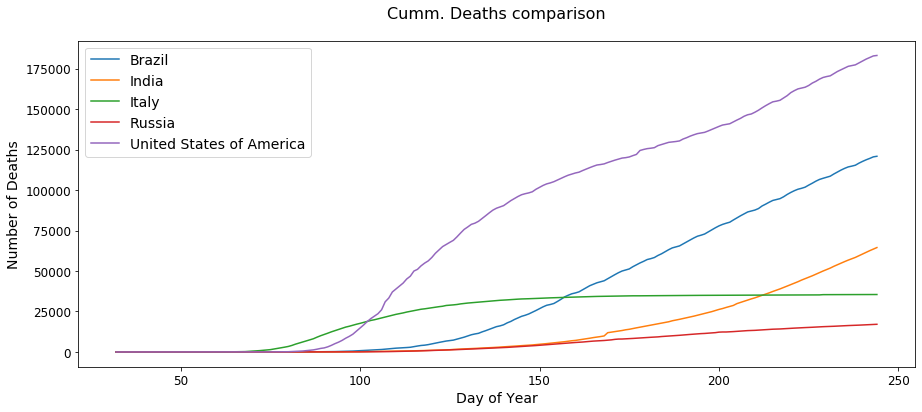

In [24]:
vis_df_fn = vis_df[['location', 'dayofyear', 'total_deaths']]
plt_line(vis_df_fn, 'dayofyear', 'location', 'Cumm. Deaths comparison',
         'Day of Year', 'Number of Deaths')

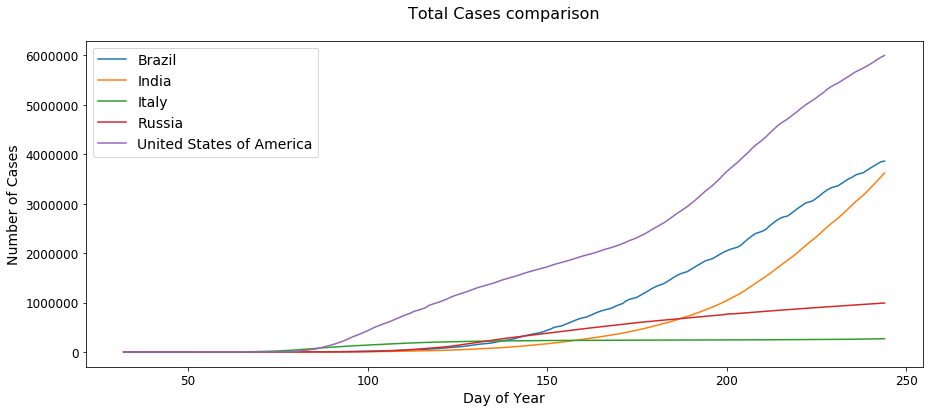

In [25]:
vis_df_fn = vis_df[['location', 'dayofyear', 'total_cases']]
plt_line(vis_df_fn, 'dayofyear', 'location', 'Total Cases comparison',
         'Day of Year', 'Number of Cases')

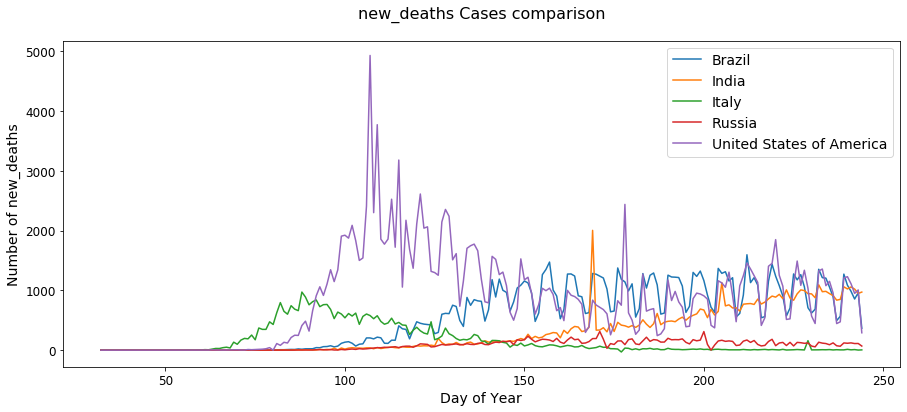

In [26]:
vis_df_fn = vis_df[['location', 'dayofyear', 'new_deaths']]
plt_line(vis_df_fn, 'dayofyear', 'location', 'new_deaths Cases comparison',
         'Day of Year', 'Number of new_deaths')

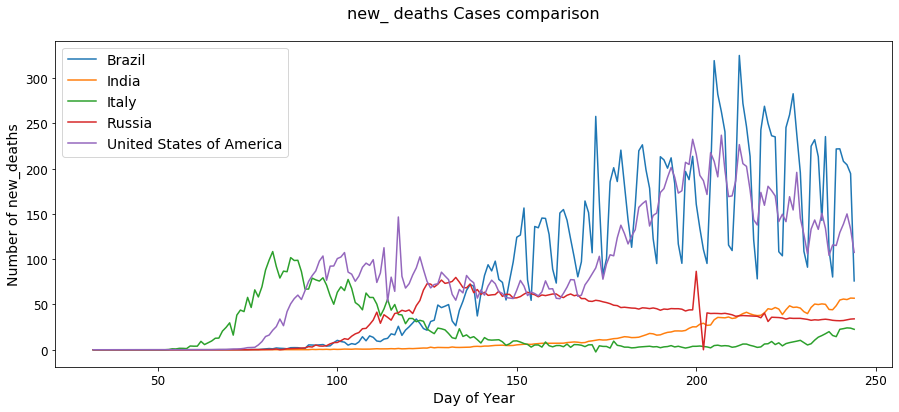

In [27]:
vis_df_fn = vis_df[['location', 'dayofyear', 'new_cases_per_million']]
plt_line(vis_df_fn, 'dayofyear', 'location', 'new_ deaths Cases comparison',
         'Day of Year', 'Number of new_deaths')

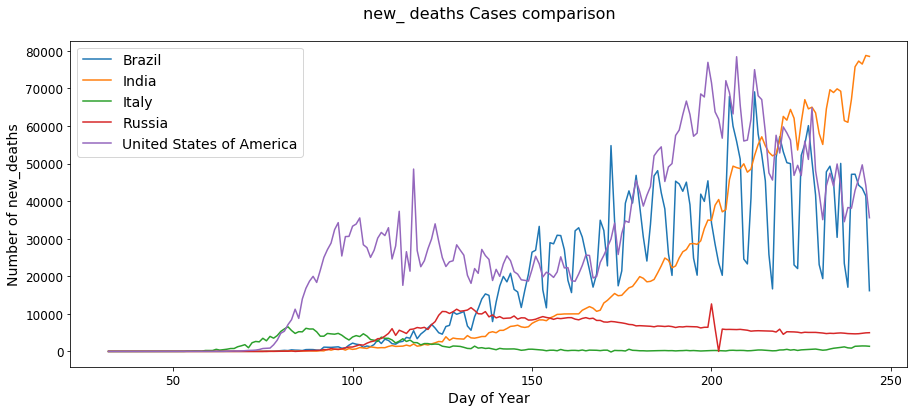

In [28]:
vis_df_fn = vis_df[['location', 'dayofyear', 'new_cases']]
plt_line(vis_df_fn, 'dayofyear', 'location', 'new_ deaths Cases comparison',
         'Day of Year', 'Number of new_deaths')

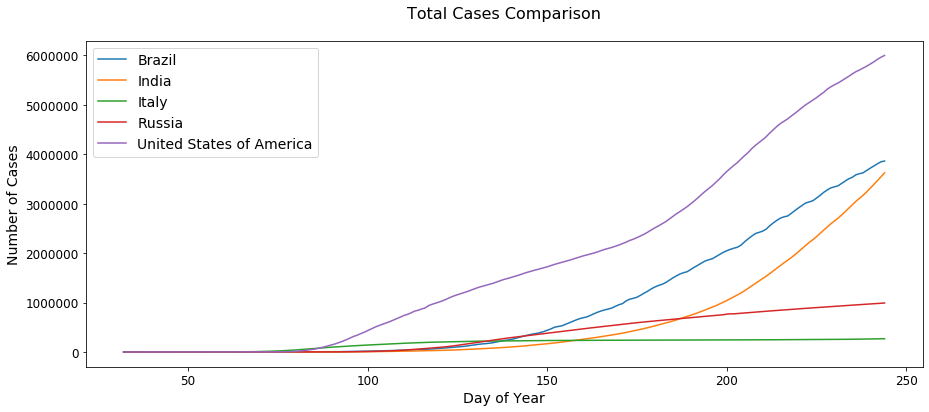

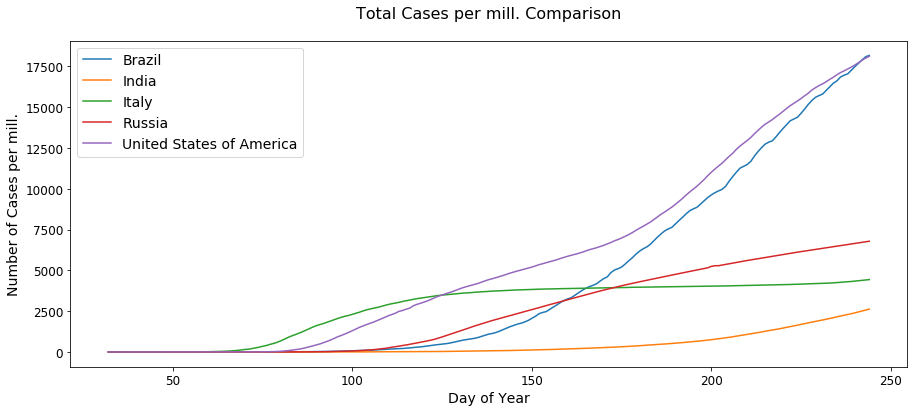

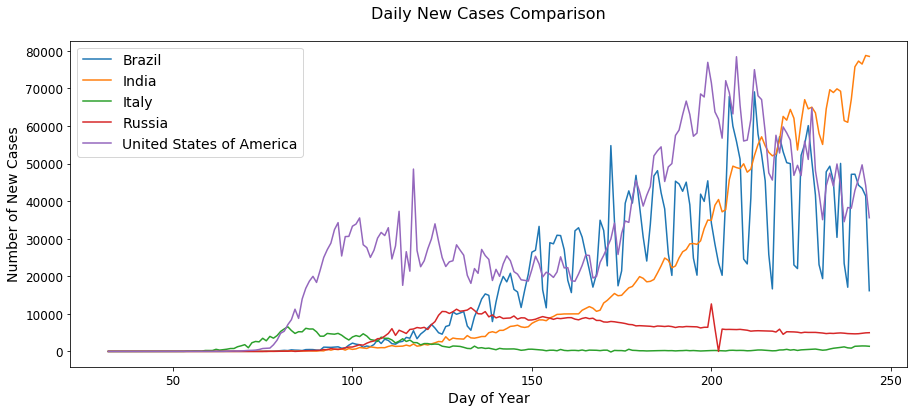

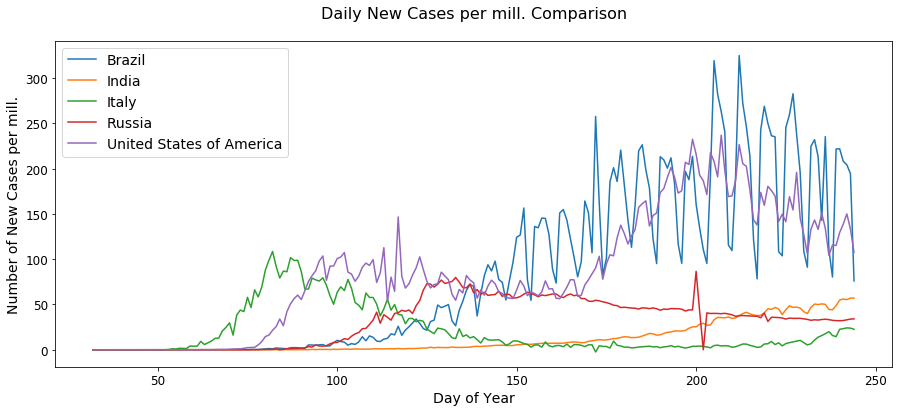

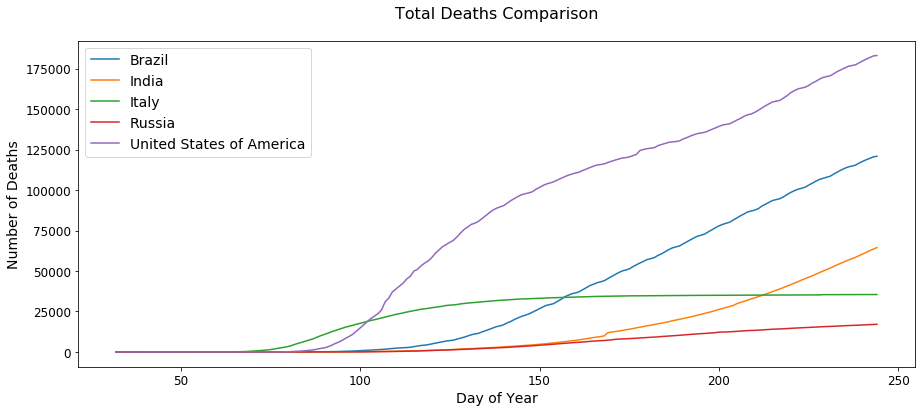

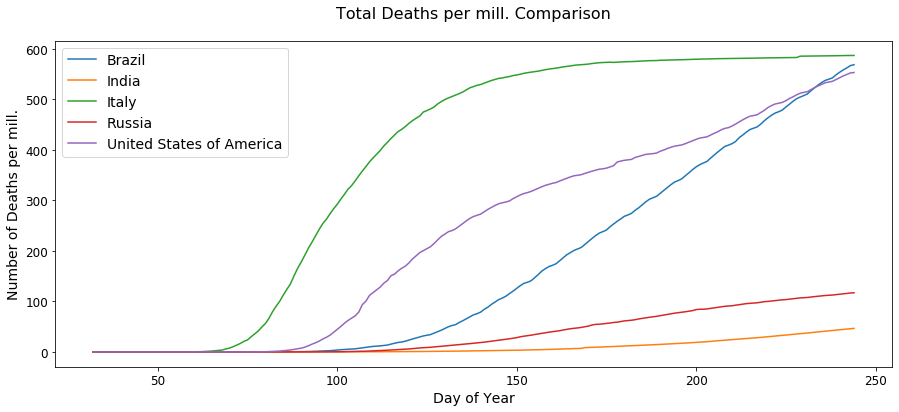

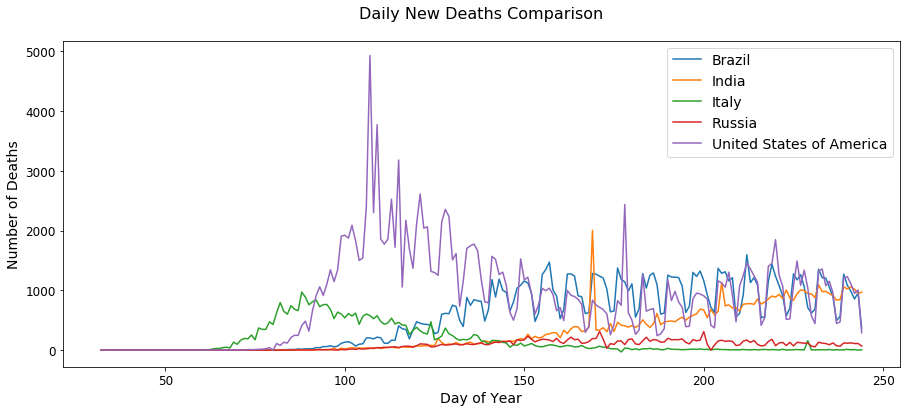

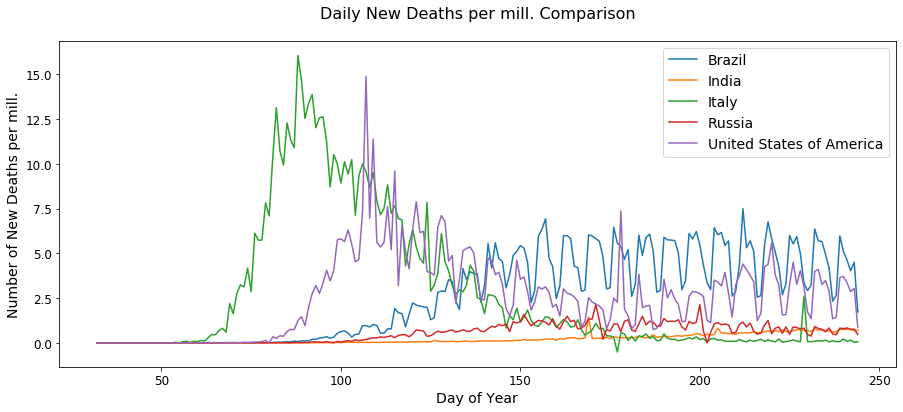

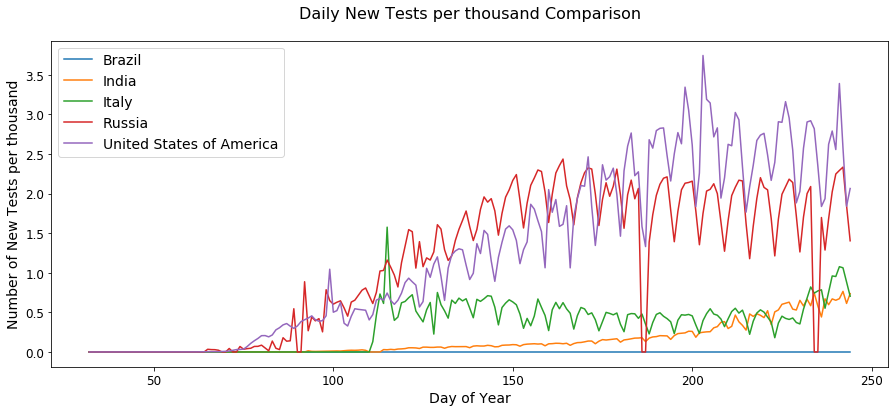

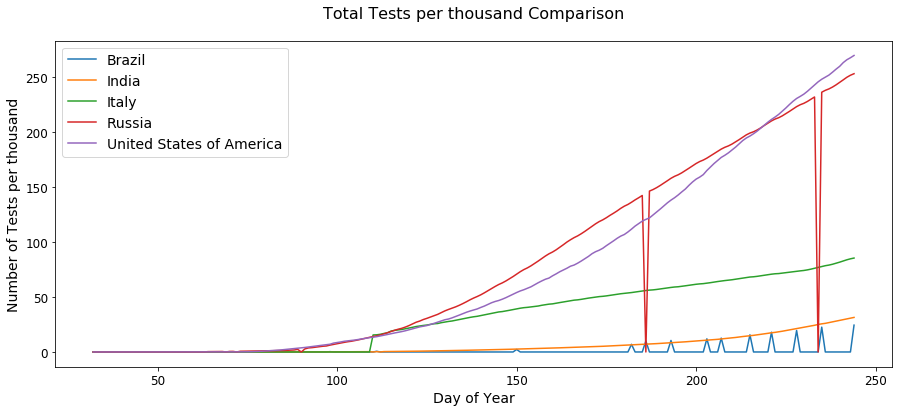

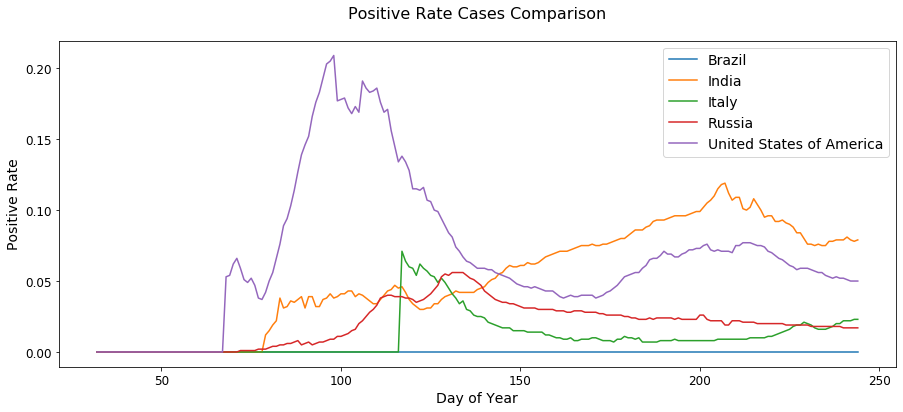

In [29]:
lssds = ['total_cases', 'total_cases_per_million', 'new_cases', 'new_cases_per_million', 'total_deaths', 
         'total_deaths_per_million', 'new_deaths', 'new_deaths_per_million', 'new_tests_per_thousand',
         'total_tests_per_thousand', 'positive_rate']

lssds = [['total_cases', 'Total Cases Comparison', 'Number of Cases'],
['total_cases_per_million', 'Total Cases per mill. Comparison', 'Number of Cases per mill.'],
['new_cases', 'Daily New Cases Comparison', 'Number of New Cases'],
['new_cases_per_million', 'Daily New Cases per mill. Comparison', 'Number of New Cases per mill.'],
['total_deaths', 'Total Deaths Comparison', 'Number of Deaths'],
['total_deaths_per_million', 'Total Deaths per mill. Comparison', 'Number of Deaths per mill.'],
['new_deaths', 'Daily New Deaths Comparison', 'Number of Deaths'],
['new_deaths_per_million', 'Daily New Deaths per mill. Comparison', 'Number of New Deaths per mill.'],
['new_tests_per_thousand', 'Daily New Tests per thousand Comparison', 'Number of New Tests per thousand'],
['total_tests_per_thousand', 'Total Tests per thousand Comparison', 'Number of Tests per thousand'],
['positive_rate', 'Positive Rate Cases Comparison', 'Positive Rate']]
for i in lssds:
    vis_df_fn = vis_df[['location', 'dayofyear', i[0]]]
    plt_line(vis_df_fn, 'dayofyear', 'location', i[1], 'Day of Year', i[2])